# 1. Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# 2. Loading Data

In [2]:
df = pd.read_csv('../input/usa-cers-dataset/USA_cars_datasets.csv')
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


# 3. Explore the Data

Usually the first thing I do is check the shape and features of the dataset using `.shape`, `.columns`, and `.info()`. 

In [3]:
df.shape

(2499, 13)

In [4]:
df.columns

Index(['Unnamed: 0', 'price', 'brand', 'model', 'year', 'title_status',
       'mileage', 'color', 'vin', 'lot', 'state', 'country', 'condition'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 253.9+ KB


In [6]:
sns.set_style('darkgrid')
plt.rcParams.update({'figure.figsize': (15,10)})
df.describe().T.style.set_properties(**{'background-color': 'grey','color': 'white','border-color': 'white'})

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2499.000000,1249.000000,721.543484,0.000000,624.500000,1249.000000,1873.500000,2498.000000
price,2499.000000,18767.671469,12116.094936,0.000000,10200.000000,16900.000000,25555.500000,84900.000000
year,2499.000000,2016.714286,3.442656,1973.000000,2016.000000,2018.000000,2019.000000,2020.000000
mileage,2499.000000,52298.685474,59705.516356,0.000000,21466.500000,35365.000000,63472.500000,1017936.000000
lot,2499.000000,167691389.060024,203877.210516,159348797.000000,167625331.000000,167745058.000000,167779772.000000,167805500.000000


In [7]:
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


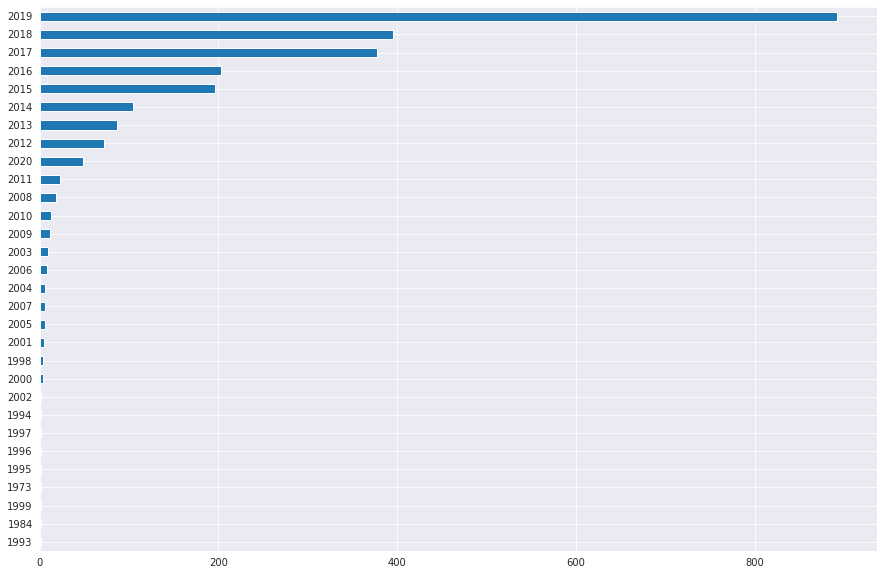

In [8]:
df['year'].value_counts().sort_values().plot(kind = 'barh');

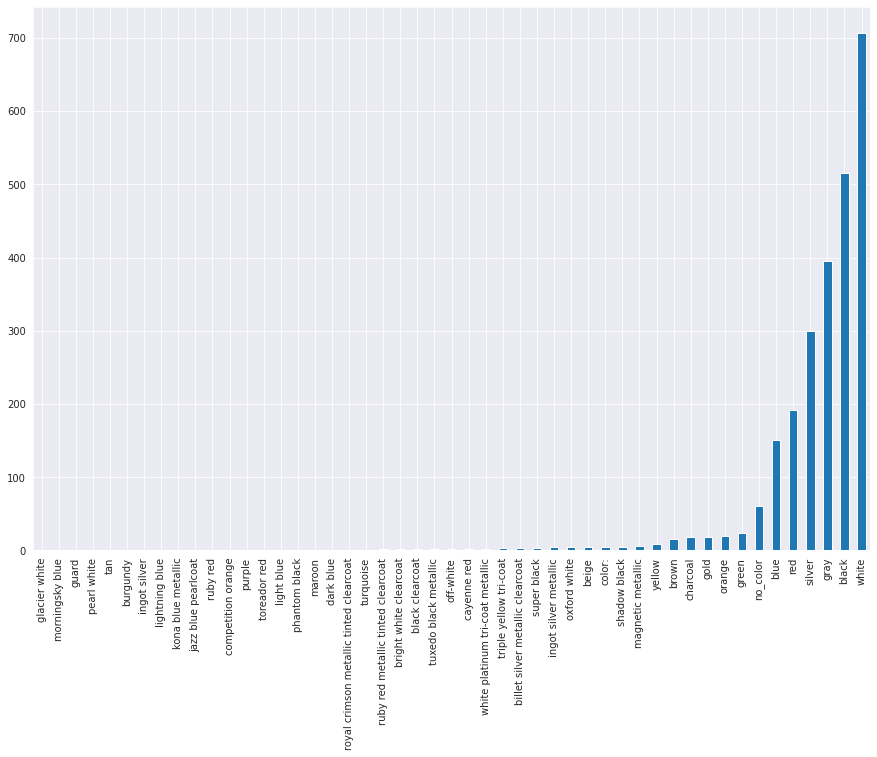

In [9]:
df['color'].value_counts().sort_values().plot(kind = 'bar');

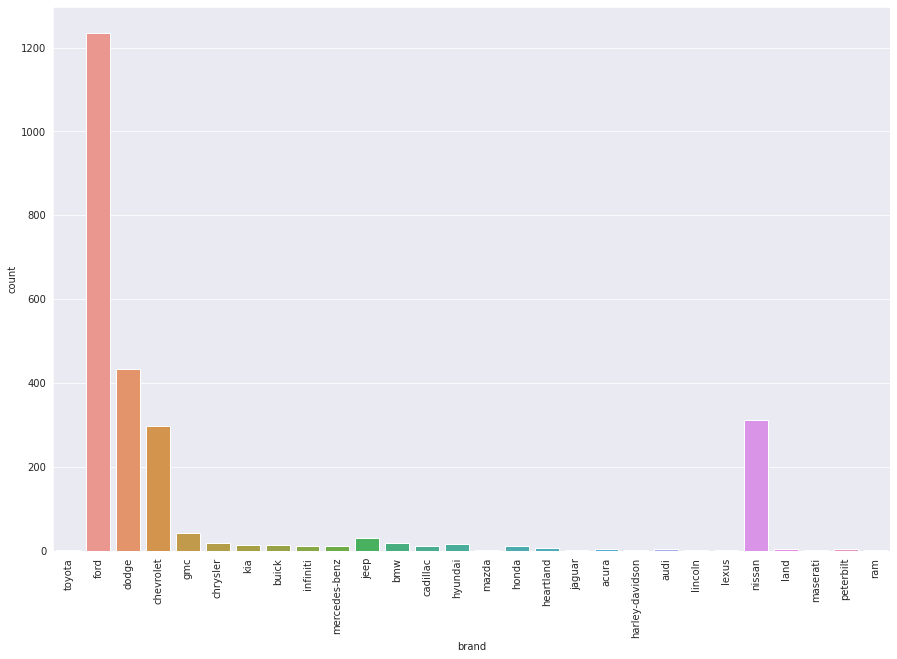

In [10]:
sns.countplot(x=df['brand'])
plt.xticks(rotation = 90);

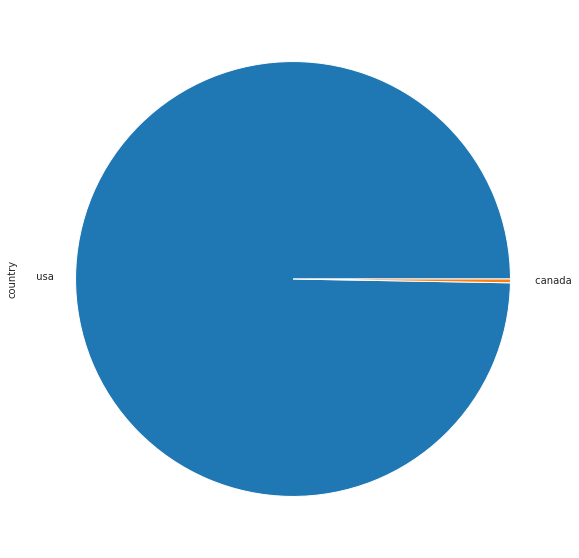

In [11]:
df['country'].value_counts().plot(kind= 'pie')
df['country'].value_counts();

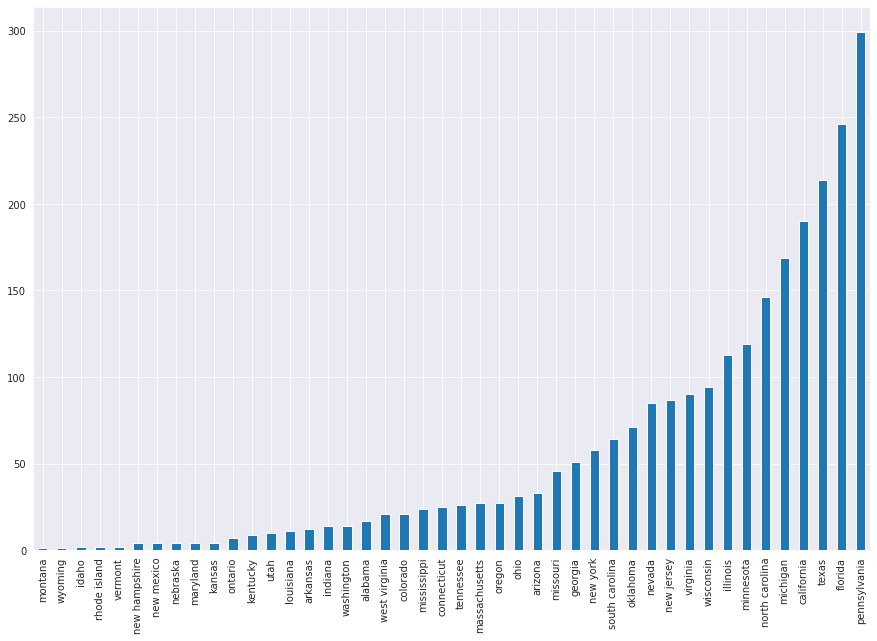

In [12]:
df['state'].value_counts().sort_values().plot(kind = 'bar');

<AxesSubplot:>

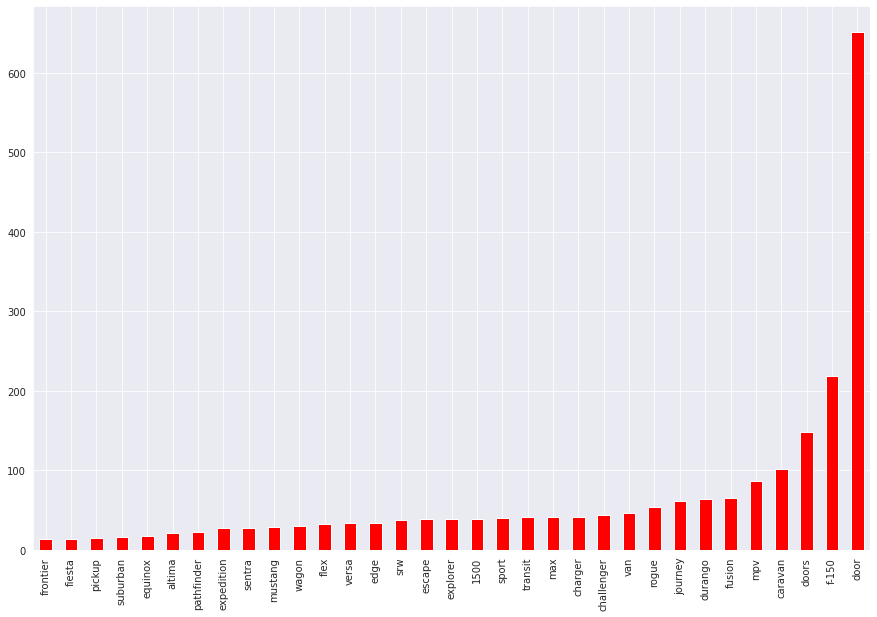

In [13]:
df['model'].value_counts()[0:33].sort_values().plot(kind = 'bar', color= "r")

<AxesSubplot:>

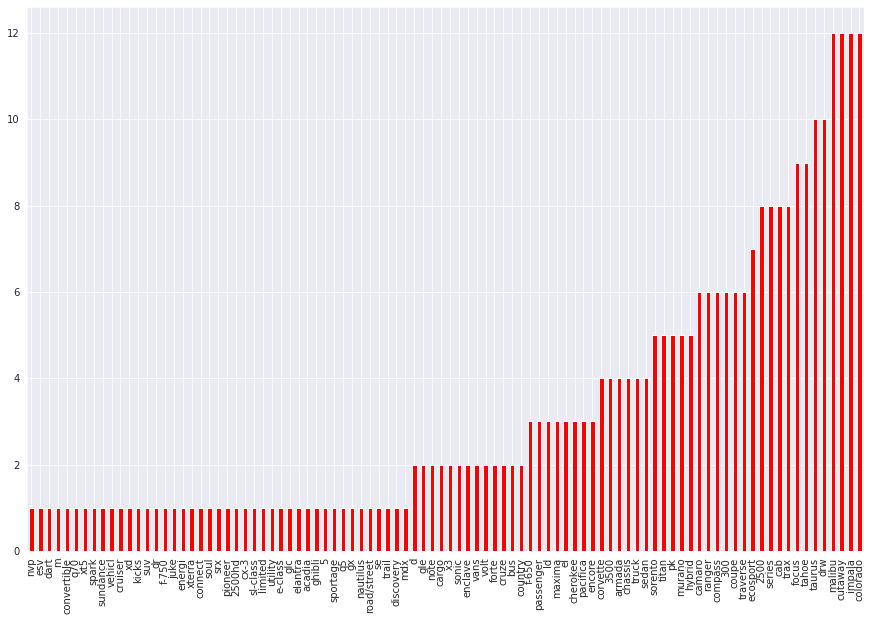

In [14]:
df['model'].value_counts()[33::].sort_values().plot(kind = 'bar', color= "r")

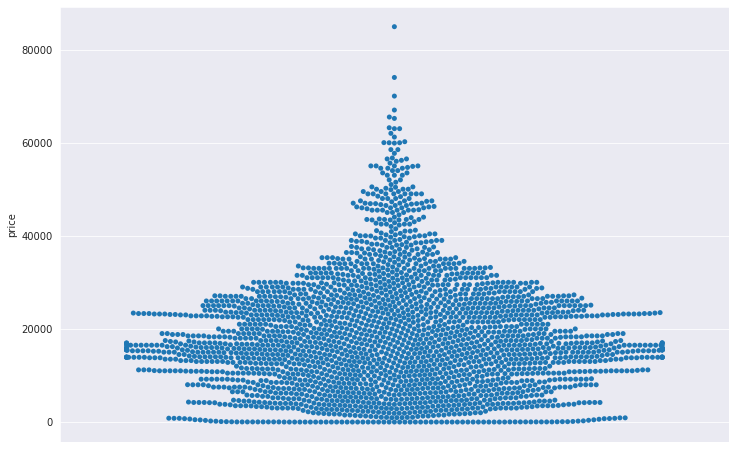

In [15]:
plt.rcParams['figure.figsize']=(12,8)
sns.swarmplot(y=df["price"]);

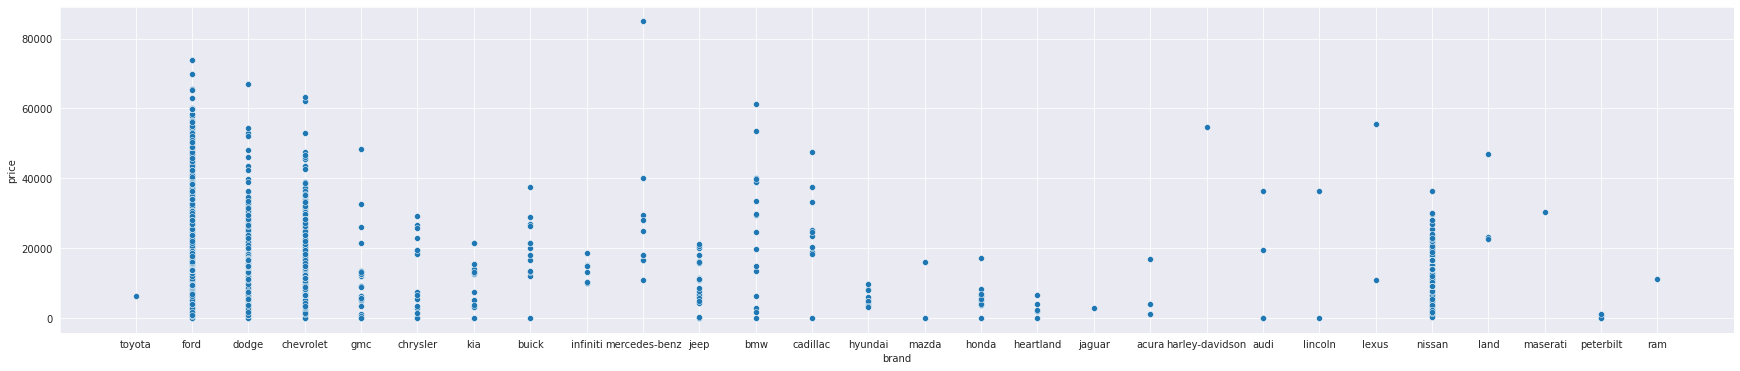

In [16]:
plt.rcParams['figure.figsize']=(30,6)
sns.scatterplot(x='brand', y='price', data=df);

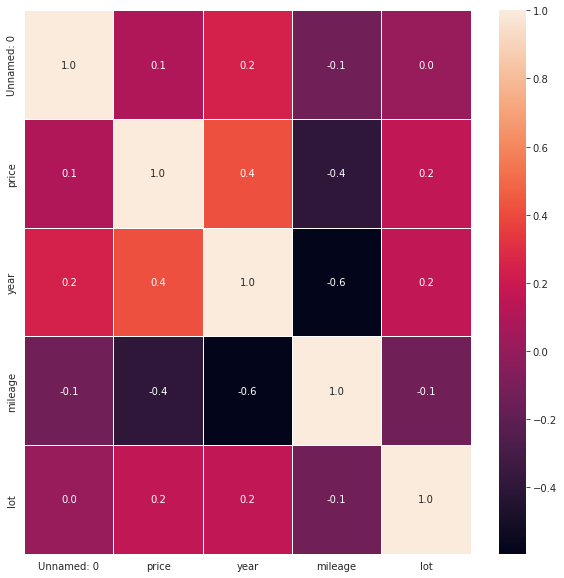

In [17]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

# 4. Answer Analytical Questions

In [18]:
#Which brand has the highest price?
df.sort_values("price")
# mercedes-benz

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
410,410,0,chevrolet,door,1995,salvage insurance,274706.0,green,2gcec19h8s1195266,167425634,arizona,usa,2 days left
330,330,0,ford,door,1996,salvage insurance,296860.0,green,1falp62w5th144314,167359712,california,usa,19 hours left
331,331,0,ford,door,2006,salvage insurance,203158.0,red,1fmzk04136ga07119,167610991,illinois,usa,17 hours left
339,339,0,ford,door,2002,salvage insurance,214800.0,black,3fafp37372r151014,167360232,south carolina,usa,2 days left
496,496,0,ford,pickup,1996,salvage insurance,252588.0,red,1ftef15n0tlc14455,167357804,oklahoma,usa,17 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,1215,65500,ford,srw,2019,clean vehicle,6500.0,black,1ft7w2bt0kec44818,167718954,indiana,usa,21 hours left
277,277,67000,dodge,challenger,2019,clean vehicle,10944.0,blue,2c3cdzl97kh518237,167759490,ohio,usa,21 hours left
1336,1336,70000,ford,drw,2019,clean vehicle,9643.0,no_color,1ft8w3dt3kee48276,167780680,illinois,usa,2 days left
1340,1340,74000,ford,drw,2019,clean vehicle,10536.0,no_color,1ft8w4dt6ked32656,167780682,illinois,usa,2 days left


In [19]:
#Is the color of the car affected by its registration year in the 21st century (we have a little data about the 20th centry)?
lst1 = []
lst2 = []
for year in df[df['year'] > 1999]['year'].sort_values().unique(): 
    x = df[df['year'] == year].value_counts('color')[0]     #Number of cars whose color is dominant for this particular year.
    print(year, df[df['year'] == year].value_counts('color').idxmax(), x)     #Print year, dominant color, and number of cars of this color. 
    lst1.append(year)
    lst2.append(df[df['year'] == year].value_counts('color').idxmax())
yc = pd.DataFrame(list(zip(lst1, lst2)), columns =['year', 'color'])
print (yc['color'].value_counts())      #Number of years when each color was dominant.
#yes, Although White was the dominant color in 12 years, the dominance wasn't complete.

2000 black 1
2001 red 2
2002 black 2
2003 white 4
2004 gray 2
2005 gray 2
2006 silver 2
2007 black 1
2008 white 5
2009 black 4
2010 white 5
2011 white 10
2012 white 27
2013 white 26
2014 white 30
2015 white 55
2016 white 57
2017 white 99
2018 white 100
2019 white 271
2020 black 13
white     12
black      5
gray       2
red        1
silver     1
Name: color, dtype: int64


In [20]:
# the propability that a FORD car has a price more than the avarage price for all cars?
print(round(df[(df['brand']=='ford') & (df['price'] > df['price'].mean())].shape[0] / df[df['brand']=='ford'].shape[0] * 100,2),'%')

56.68 %


In [21]:
#Which model has the lowest mileage?
df[df['mileage'] == df['mileage'].min()]['model'].unique()
# Door, Chassis, and Truck

array(['door', 'chassis', 'truck'], dtype=object)

In [22]:
#Which state has the highest number of DODGEs?
df[df['brand'] == 'dodge'].value_counts('state').idxmax()
# pennsylvania

'pennsylvania'

In [23]:
#What’s the most popular color in the cheapest cars?
df[df['price'] == df['price'].min()]['color'].value_counts()#.idxmax()
#Black, Grey, and Green

black         6
gray          6
green         6
white         5
red           5
silver        4
blue          4
orange        2
gold          2
maroon        1
yellow        1
light blue    1
Name: color, dtype: int64

In [24]:
#Which is the best selling brand in Virginia?
df[df['state'] == 'virginia'].value_counts('brand').idxmax()

'ford'

In [25]:
#When was ford the best selling car?
for year in df['year'].unique(): 
  if df[df['year'] == year].value_counts('brand').idxmax() == 'chevrolet':
    print (year)

2008
2011
2010
2009
1973
2006
2007
2004
1995


# 5. Clean the Data

* Fill in missing values
* Add in new columns if you think they'd be helpful
* Remove unnecessary features

In [26]:
df.drop(['Unnamed: 0','vin','lot'],axis=1,inplace=True)

In [27]:
df['value']= df['condition'] .str.split(' ').str[0]
df['days']= df['condition'] .str.split(' ').str[1]

def days_to_min_converter(time):
    return int(time)*1440

def hours_to_min_converter(time):
    return int(time)*60


temp_data=pd.concat([df[df['days']=='days']['value'].apply(days_to_min_converter),
           df[df['days']=='hours']['value'].apply(hours_to_min_converter),
           df[df['days']=='minutes']['value'].astype(int)]).rename('Minutes_Left',inplace=True)



df=pd.concat([df,temp_data],axis=1)
df['Minutes_Left'].fillna(-200,inplace=True)

df.drop(['condition','value','days'],axis=1,inplace=True)

# 6. Models Building & Evaluation

In [28]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']

In [29]:
X=df.drop('price',axis=1)
y=df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

train_set=pd.concat([X_train,y_train],axis=1)
test_set=pd.concat([X_test,y_test],axis=1)

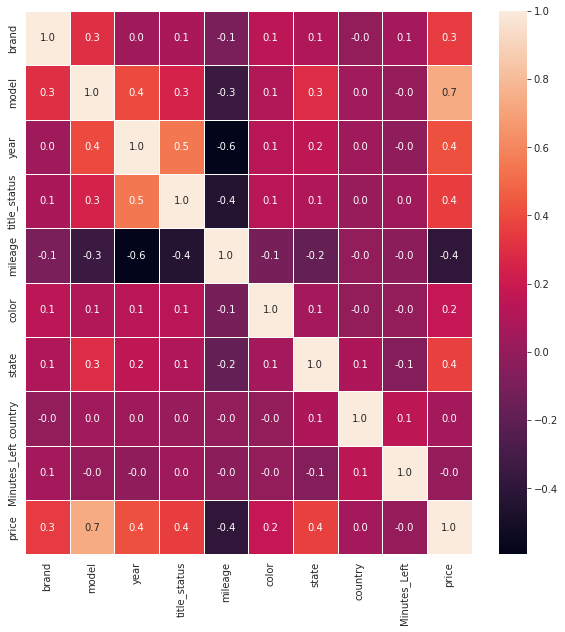

In [30]:
for feature in categorical_features:
    feature_labels=train_set.groupby(feature)['price'].mean().sort_values().index
    feature_labels={k:i for i,k in enumerate(feature_labels,0)}
    train_set[feature]=train_set[feature].map(feature_labels)
    test_set[feature]=test_set[feature].map(feature_labels)

test_set.dropna(inplace=True)

scaler=StandardScaler()

scaled_X_train=pd.DataFrame(scaler.fit_transform(train_set.drop('price',axis=1)), columns=X_train.columns)
scaled_X_train.index=train_set.index
scaled_X_test=pd.DataFrame(scaler.transform(test_set.drop('price',axis=1)), columns=X_test.columns)
scaled_X_test.index=test_set.index
scaled_train=pd.concat([scaled_X_train,train_set['price']],axis=1)
scaled_test=pd.concat([scaled_X_test,test_set['price']],axis=1)
X_train=scaled_train.drop('price',axis=1) 
y_train=scaled_train['price']
X_test=scaled_test.drop('price',axis=1)
y_test=scaled_test['price']

f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(scaled_train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [31]:
def try_model(model):
    model.fit(X_train, y_train)
 
    y_pred = model.predict(X_test)
    pd.DataFrame(y_pred)
    return 'Model Testing Accurancy: ', r2_score(y_test, y_pred)

In [32]:
neigh = KNeighborsRegressor(n_neighbors=6)
try_model(neigh)

('Model Testing Accurancy: ', 0.6945991238808297)

In [33]:
forest = RandomForestRegressor(max_depth=50, random_state=1)
try_model(forest)

('Model Testing Accurancy: ', 0.7542184266653602)

In [34]:
XGB = XGBRegressor(n_estimators=500, max_depth=20, eta=0.1, subsample=0.7, colsample_bytree=0.8)
try_model(XGB)

('Model Testing Accurancy: ', 0.7562192644448956)